In [2]:
%reload_ext autoreload
%autoreload 2

import os
import sys
import numpy as np
from astropy import units as u
from astropy import constants as c
from astropy.cosmology import Planck18 as cosmo
from tqdm import tqdm

import jax
jax.config.update("jax_enable_x64", True)
import jax.numpy as jnp
from functools import partial

sys.path.append(os.environ['DM21CM_DIR'])
from preprocessing.accretion import PBHAccretionModel, Mdot_PR, Mdot_BHL
from preprocessing.halo import *
# from dm21cm.preprocessing.hmf import *
from dm21cm.utils import load_h5_dict

sys.path.append(os.environ['DH_DIR'])
from darkhistory import physics as dh_phys

import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc_file('../matplotlibrc')

In [ ]:
am = PBHAccretionModel(accretion_type='PR-ADAF', c_in=23)
z = 10
m_halo = 1e8 # [M_sun]
c_halo = cmz(m_halo, z)
print(f'c = {c_halo:.4f}')
m_PBH = 100 # [M_sun]
f_PBH = 1

In [3]:
import hmf
import halomod

print(f'Using hmf version {hmf.__version__}')
print(f'Using halomod version {halomod.__version__}')

Using hmf version 3.4.4
Using halomod version 2.1.0


Halomod version  2.1.0


/n/home07/yitians/.conda/envs/dm21cm/lib/python3.11/site-packages/halomod/concentration.py:595: UserWarning: Only use Ludlow16Empirical c(m,z) relation when using Planck-like cosmology
  warnings.warn(


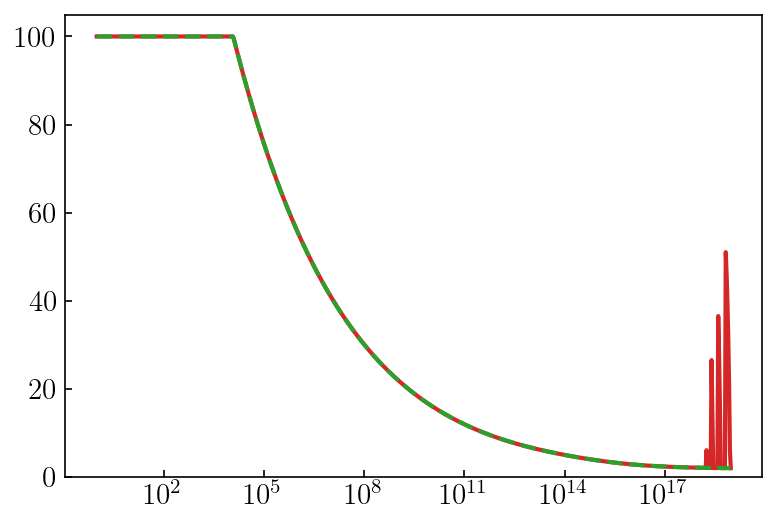

In [4]:
print('Halomod version ', halomod.__version__)
hm = halomod.DMHaloModel(
    halo_concentration_model='Ludlow16',
    z = 0, Mmin = 0., Mmax = 19, dlog10m = 0.025,
    mdef_model='SOCritical', halo_profile_model = halomod.profiles.NFW
)
hm_m_s, hm_cmz_s = fix_cmz_numerical_issues(hm.m, hm.cmz_relation)
# np.save('tmpz0.npy', np.array([hm_m_s, hm_cmz_s]))
hme = halomod.DMHaloModel(
    halo_concentration_model='Ludlow16Empirical',
    z = 0, Mmin = 0., Mmax = 19, dlog10m = 0.025,
    mdef_model='SOCritical', halo_profile_model = halomod.profiles.NFW
)
hme_m_s, hme_cmz_s = fix_cmz_numerical_issues(hme.m, hme.cmz_relation)
# np.save('tmpez0.npy', np.array([hme_m_s, hme_cmz_s]))

plt.plot(hm.m, hm.cmz_relation)
plt.plot(hm_m_s, hm_cmz_s, '--')
plt.xscale('log')
plt.ylim(0, None);

In [5]:
_m = 1e10 * cosmo.h**-1
np.log10(cmz(_m, 0))

1.1875007235177764